In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
train = pd.read_csv('./housing/train.csv')

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [41]:
len(train.columns.values)

81

### Above data shows that this dataset contain lots of feature so we need need list out the features which is most important , moderately  important , fairly important and not important at all

In [42]:
train.isna().sum()[train.isna().sum() > 0.7*1460]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

### From above data we can see that we have four columns whose more than 70% of data are missing

In [47]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [49]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [51]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [52]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [61]:
train['Fence'] = train['Fence'].fillna(value='NoFence')

In [62]:
train['Fence']

0       NoFence
1       NoFence
2       NoFence
3       NoFence
4       NoFence
5         MnPrv
6       NoFence
7       NoFence
8       NoFence
9       NoFence
10      NoFence
11      NoFence
12      NoFence
13      NoFence
14         GdWo
15        GdPrv
16      NoFence
17      NoFence
18      NoFence
19        MnPrv
20      NoFence
21        GdPrv
22      NoFence
23      NoFence
24        MnPrv
25      NoFence
26      NoFence
27      NoFence
28      NoFence
29      NoFence
         ...   
1430    NoFence
1431    NoFence
1432    NoFence
1433    NoFence
1434    NoFence
1435      GdPrv
1436       GdWo
1437    NoFence
1438      MnPrv
1439    NoFence
1440    NoFence
1441    NoFence
1442    NoFence
1443    NoFence
1444    NoFence
1445    NoFence
1446    NoFence
1447    NoFence
1448       GdWo
1449    NoFence
1450    NoFence
1451    NoFence
1452    NoFence
1453    NoFence
1454    NoFence
1455    NoFence
1456      MnPrv
1457      GdPrv
1458    NoFence
1459    NoFence
Name: Fence, Length: 146

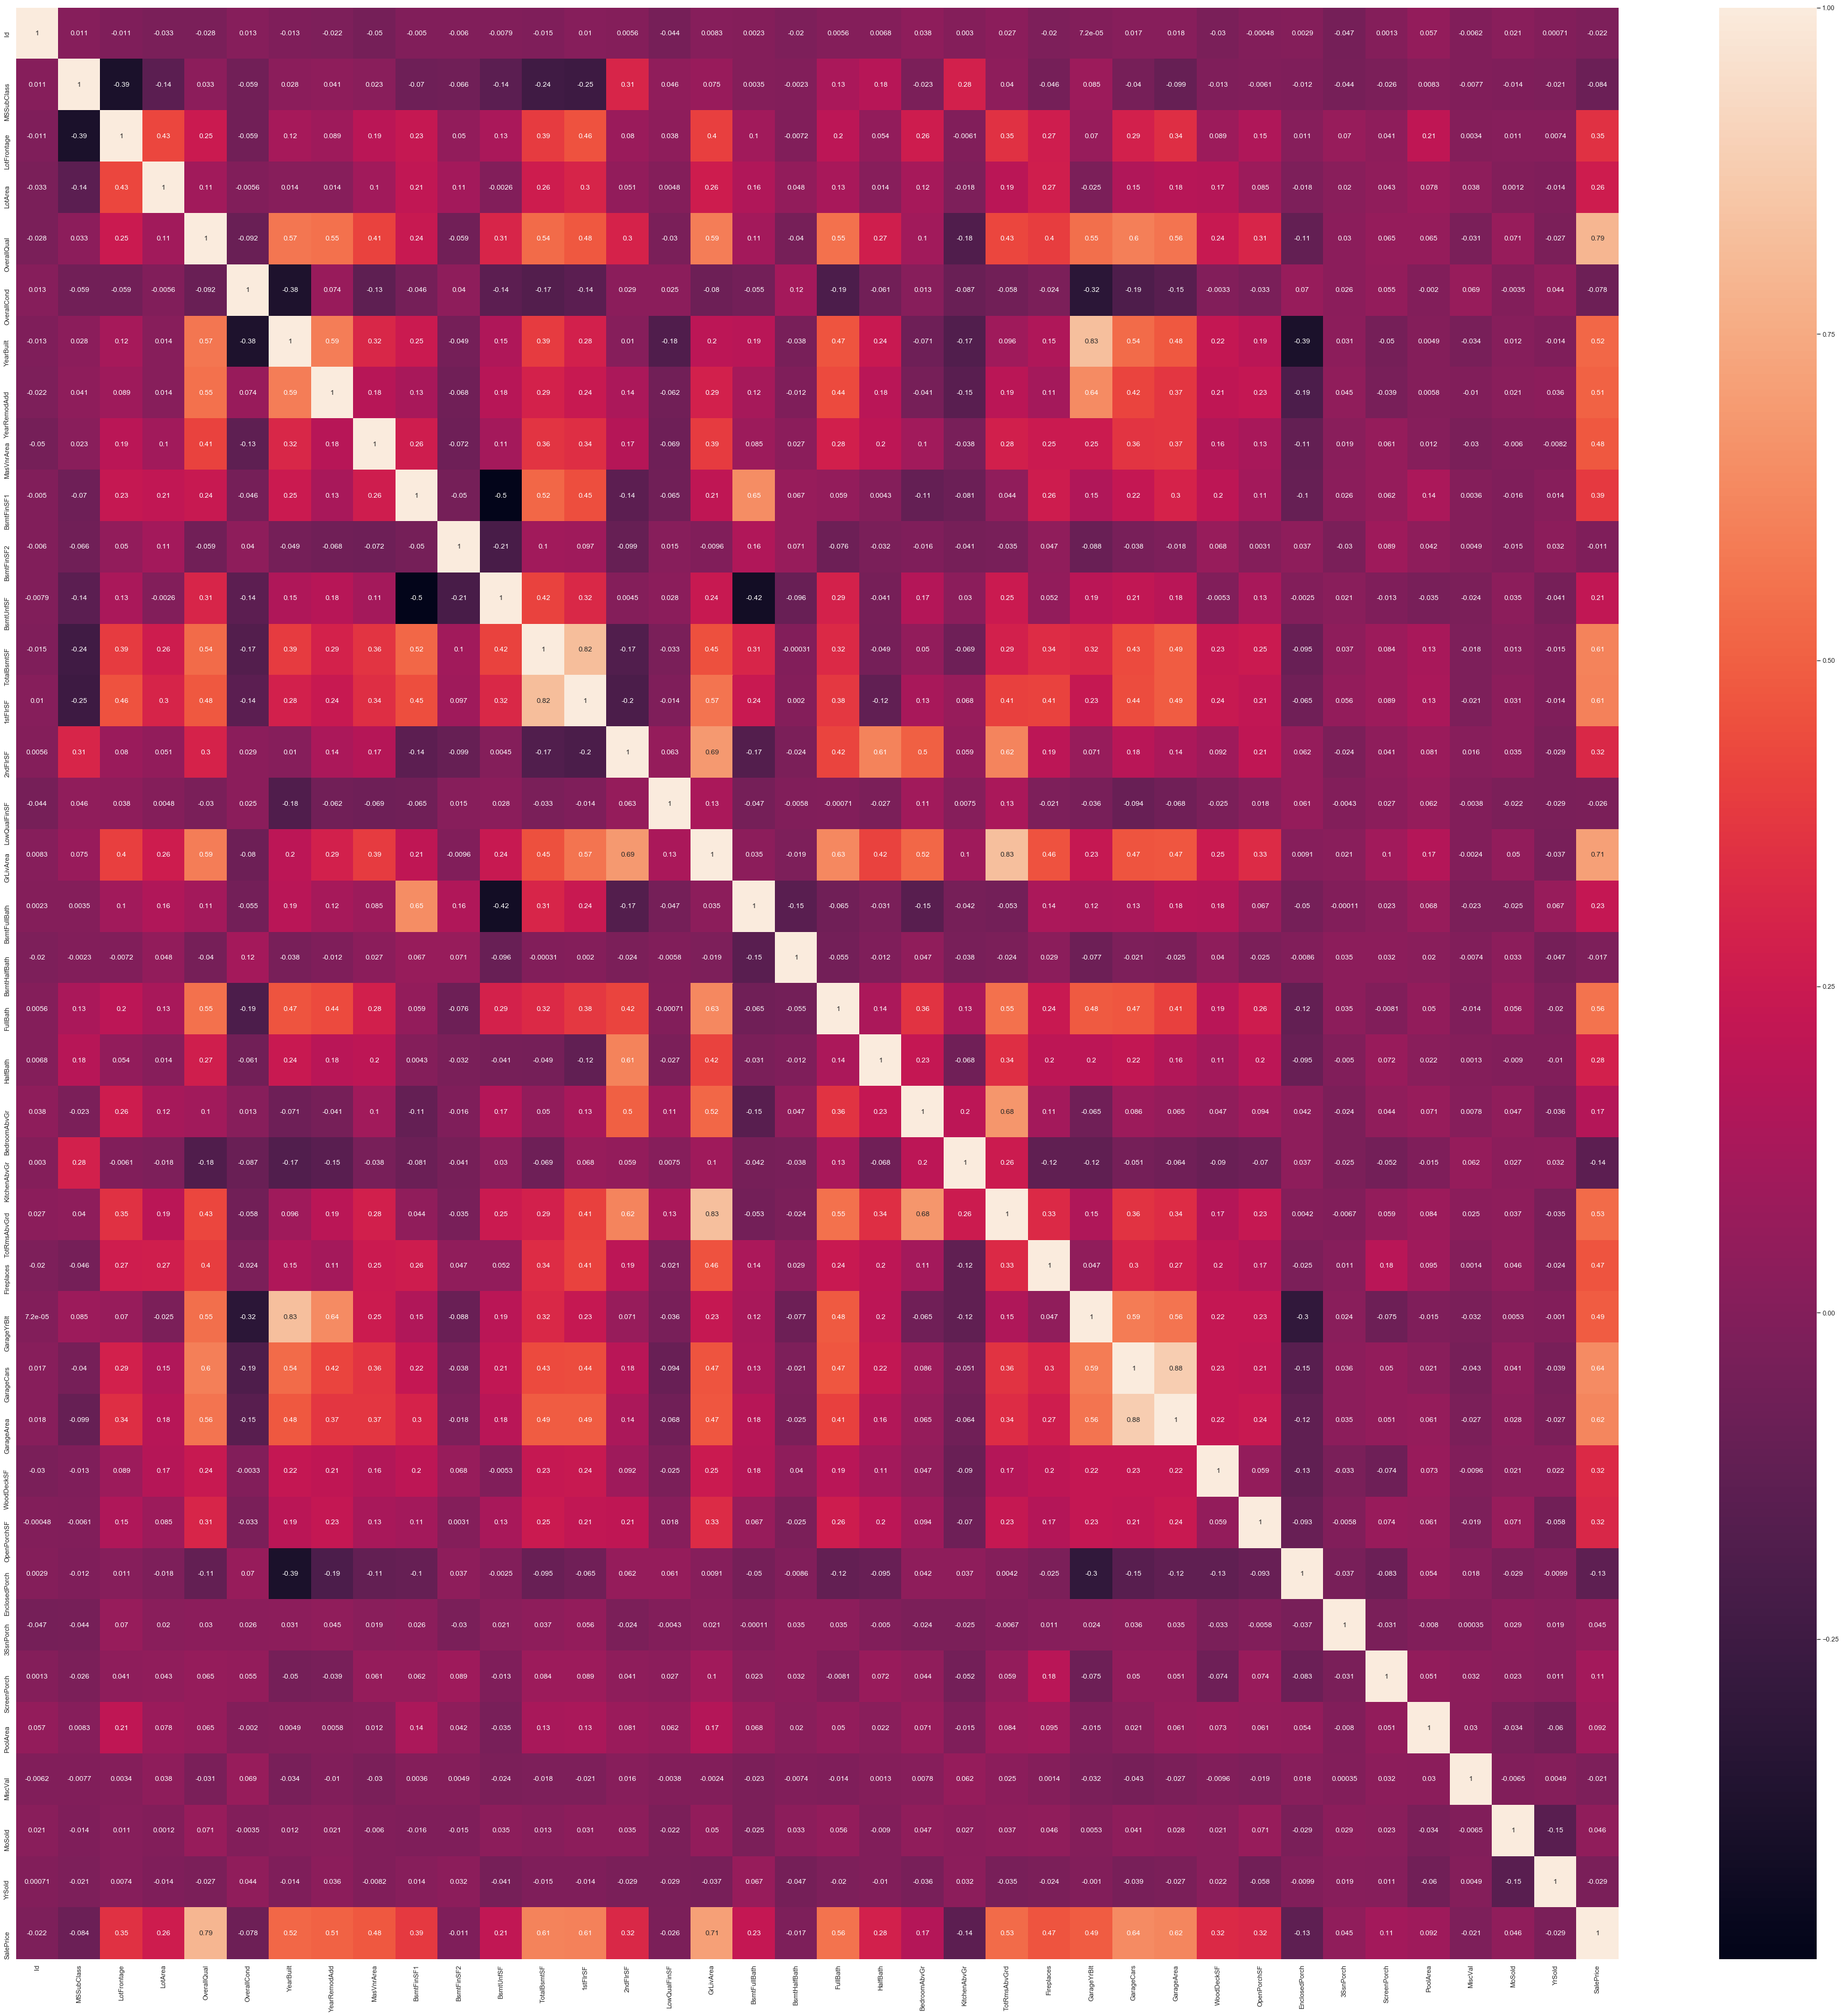

In [50]:
sns.set(rc={'figure.figsize':(60,60)})
sns.heatmap(data = train.corr(),annot= True)

In [56]:
train.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [79]:
display(train.corr().SalePrice[train.corr().SalePrice > 0.4].sort_values())

Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [73]:
display(train.corr().SalePrice[train.corr().SalePrice < 0.0])

Id              -0.021917
MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MiscVal         -0.021190
YrSold          -0.028923
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8C1053E10>,
      dtype=object)

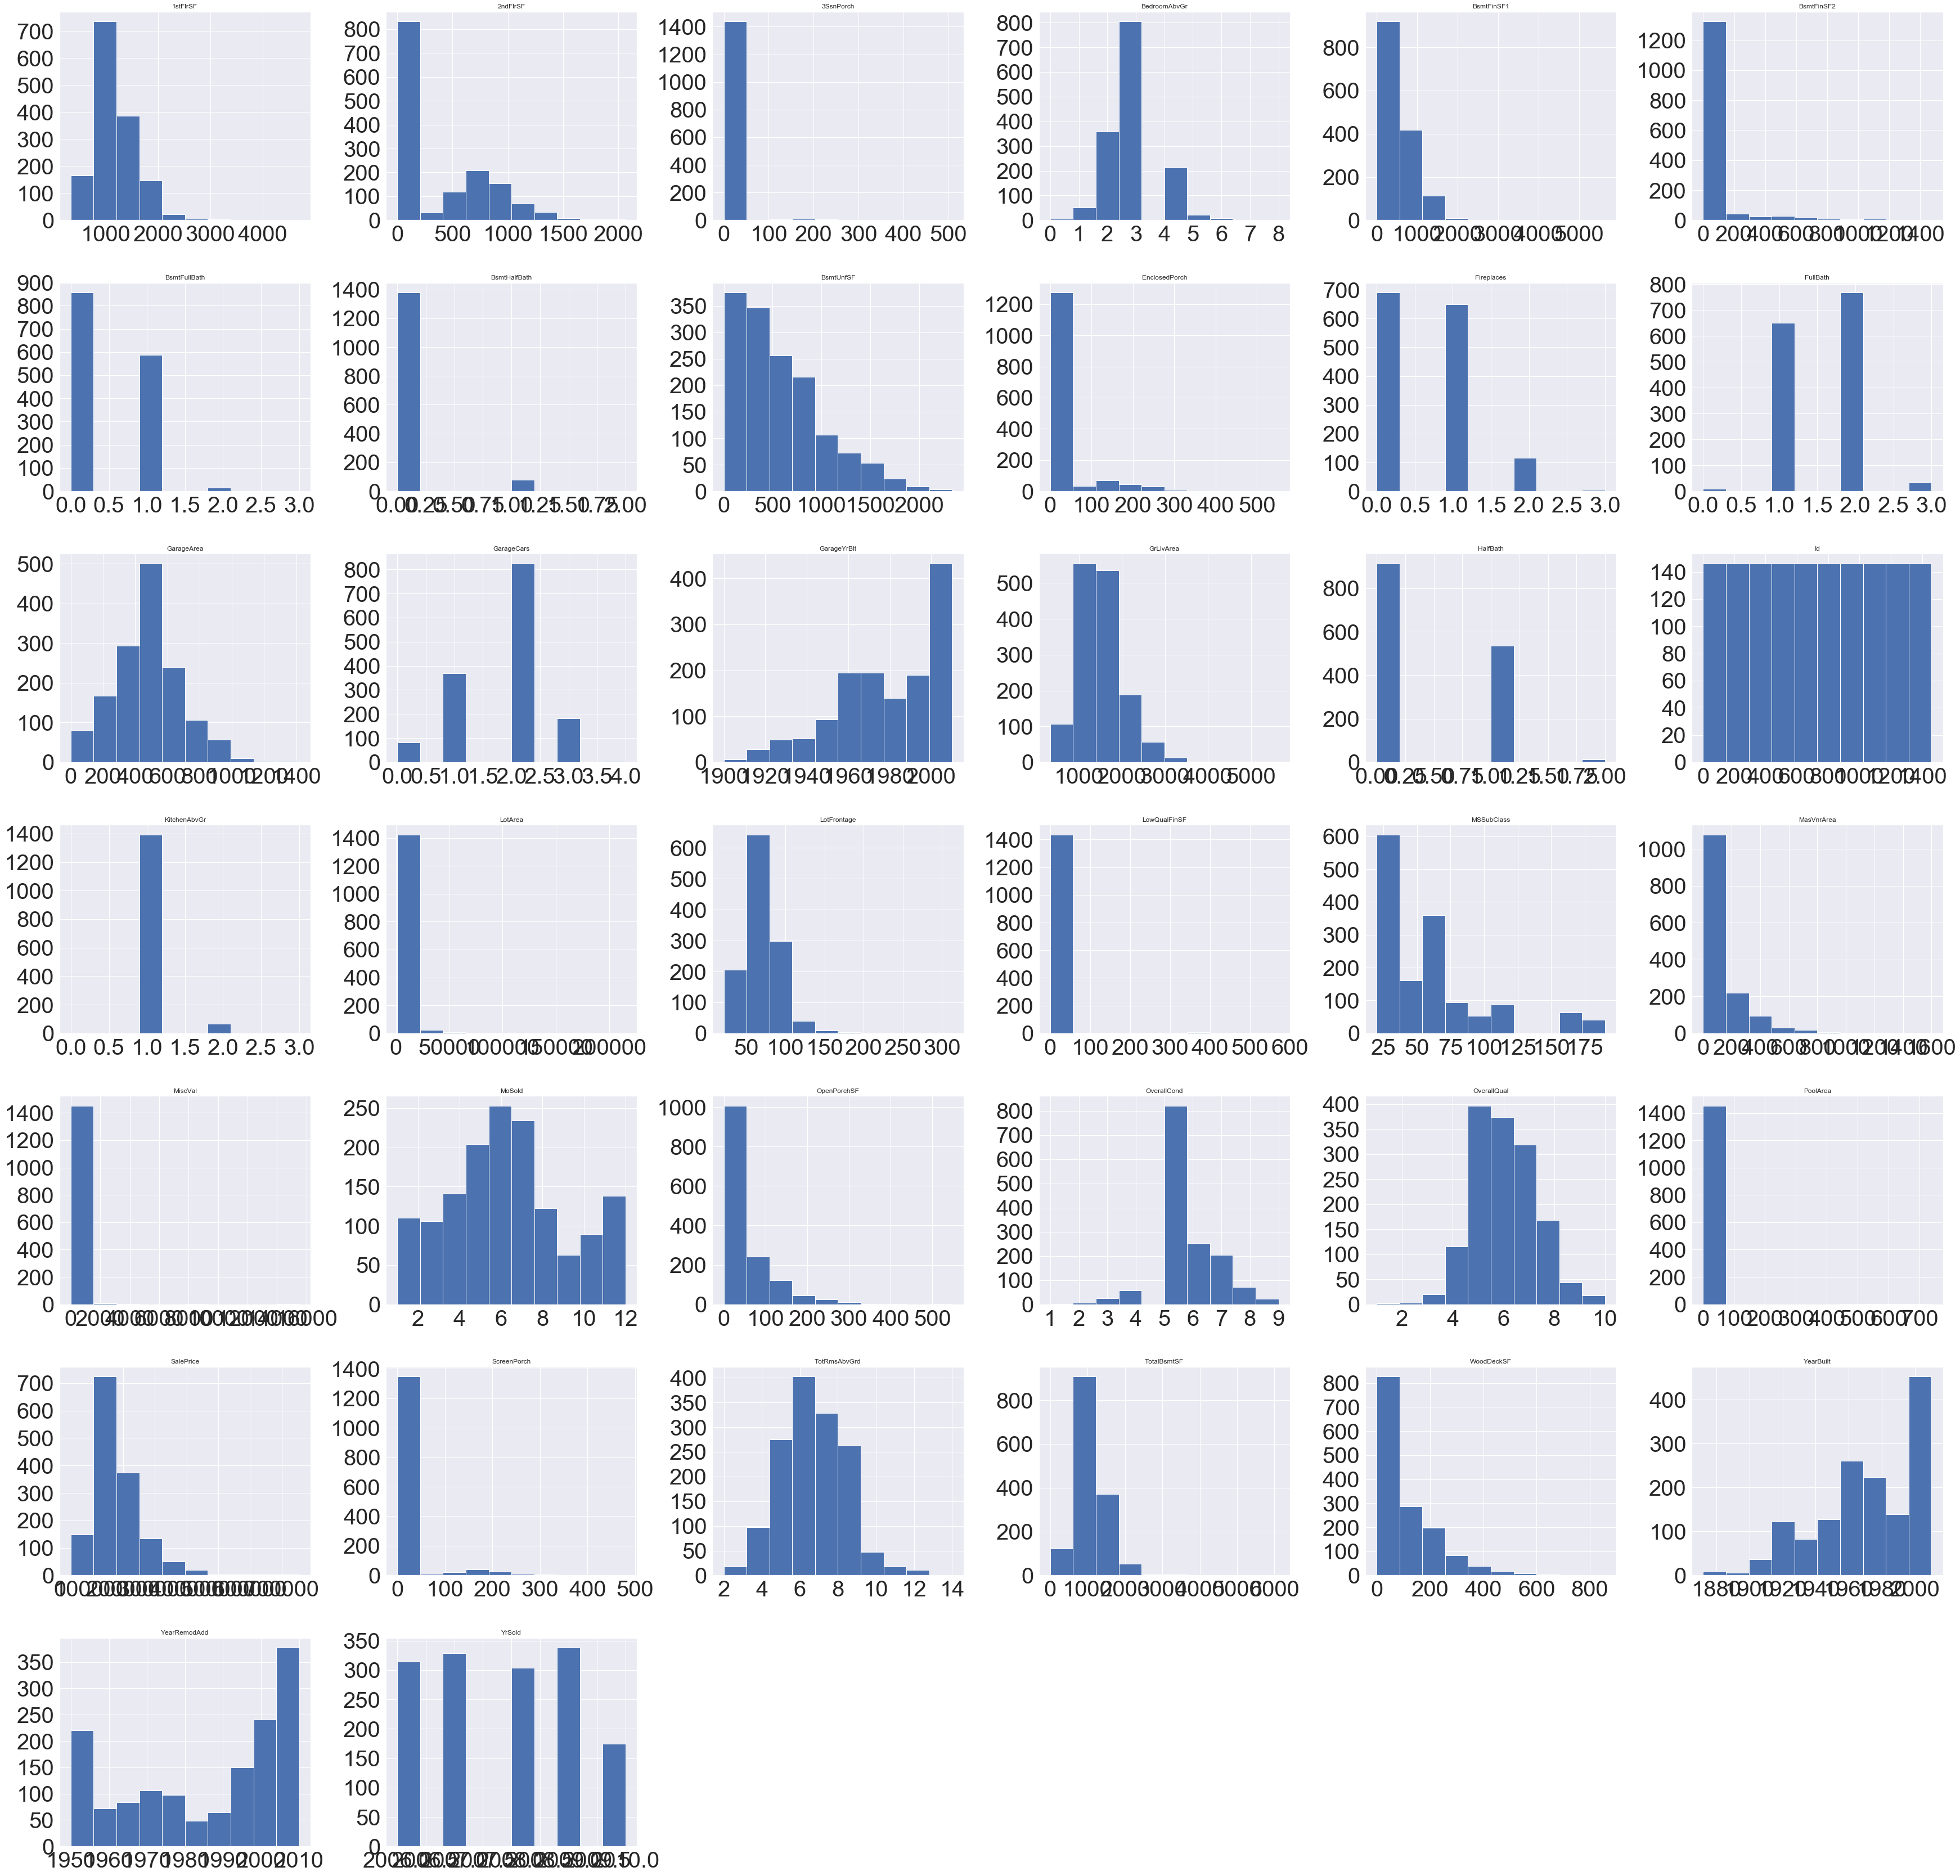

In [59]:
train.hist()

In [63]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NoFence,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NoFence,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NoFence,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NoFence,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NoFence,NaN,0,12,2008,WD,Normal,250000


In [65]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [75]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

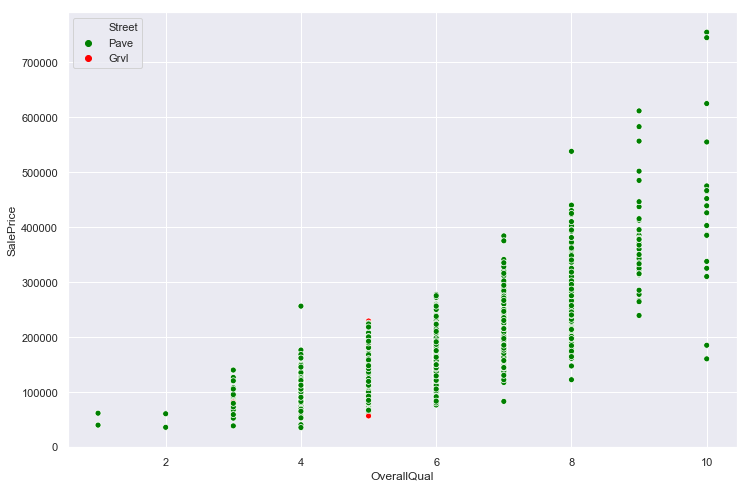

In [89]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='OverallQual',y='SalePrice',data=train,hue='Street',palette=['green', 'red'])

#### from above plot we can see that SalesPrice and OverallQuality are linearly dpendent  and there are very few Gravelled street and most of street joining houses are Paved

In [91]:
train.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

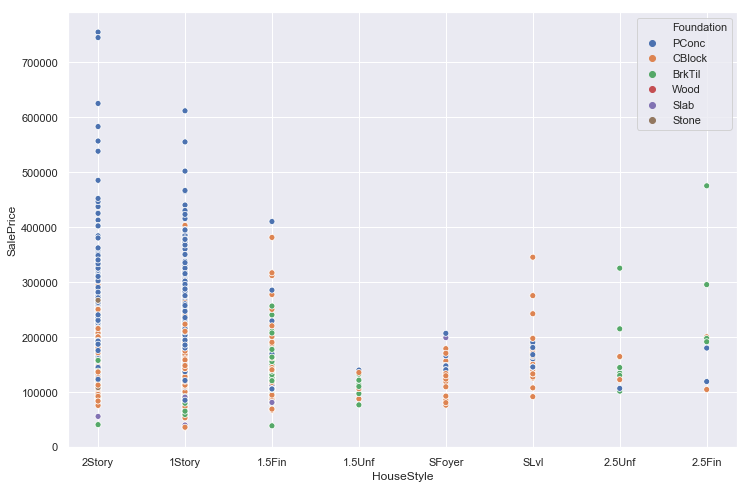

In [94]:
sns.scatterplot(x='HouseStyle',y='SalePrice',data=train,hue='Foundation')

### 1.  So from above plot we saw that building having foundation of PConc has higher Sales Price than other Foundation  and among them  most  of them are 2 Story and 1 Story buildings.

In [99]:
train.corr().columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [107]:
for data in train.columns.values:
    if not(data in train.corr().columns.values):
        print(data+':  '+str(train[data].unique()))

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street:  ['Pave' 'Grvl']
Alley:  [nan 'Grvl' 'Pave']
LotShape:  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour:  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:  ['AllPub' 'NoSeWa']
LotConfig:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:  ['Gtl' 'Mod' 'Sev']
Neighborhood:  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1:  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2:  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl:  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

### listing all the uniques values of categorical data in training set

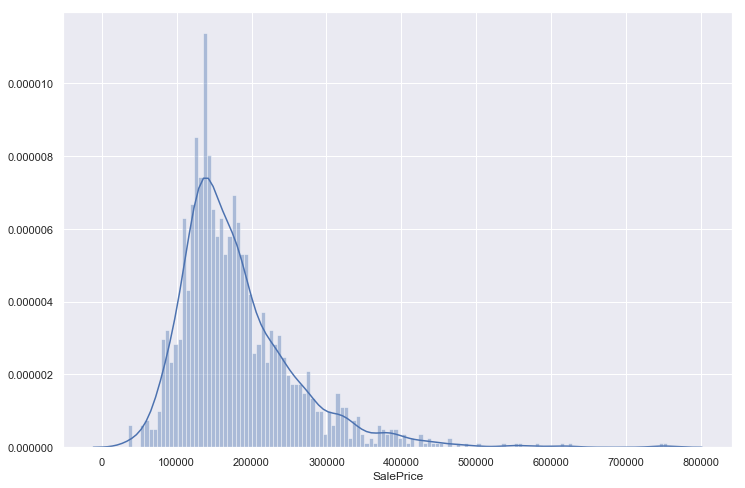

In [119]:
sns.distplot(train['SalePrice'],bins=130)